<a href="https://colab.research.google.com/github/kshiteejtoradmal-art/BML-submission/blob/main/Project2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

df = sns.load_dataset('titanic')
print("First 5 rows: \n", df.head())

print("\n Shape:", df.shape)
print("\n Info:", df.info())

print("\n Description:\n", df.describe(include='all'))

First 5 rows: 
    survived  pclass     sex   age  sibsp  parch     fare embarked  class  \
0         0       3    male  22.0      1      0   7.2500        S  Third   
1         1       1  female  38.0      1      0  71.2833        C  First   
2         1       3  female  26.0      0      0   7.9250        S  Third   
3         1       1  female  35.0      1      0  53.1000        S  First   
4         0       3    male  35.0      0      0   8.0500        S  Third   

     who  adult_male deck  embark_town alive  alone  
0    man        True  NaN  Southampton    no  False  
1  woman       False    C    Cherbourg   yes  False  
2  woman       False  NaN  Southampton   yes   True  
3  woman       False    C  Southampton   yes  False  
4    man        True  NaN  Southampton    no   True  

 Shape: (891, 15)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  --

In [ ]:
from sklearn.preprocessing import LabelEncoder

encoder= LabelEncoder()
df['sex_encoded'] = encoder.fit_transform(df['sex'])
print("Label Encoder column:\n",df[['sex','sex_encoded']].head())

df_encoded = pd.get_dummies(df,columns=['class'])
print("\n One Hot Encoded column:\n", df_encoded.head())

Label Encoder column:
       sex  sex_encoded
0    male            1
1  female            0
2  female            0
3  female            0
4    male            1

 One Hot Encoded column:
    survived  pclass     sex   age  sibsp  parch     fare embarked    who  \
0         0       3    male  22.0      1      0   7.2500        S    man   
1         1       1  female  38.0      1      0  71.2833        C  woman   
2         1       3  female  26.0      0      0   7.9250        S  woman   
3         1       1  female  35.0      1      0  53.1000        S  woman   
4         0       3    male  35.0      0      0   8.0500        S    man   

   adult_male deck  embark_town alive  alone  sex_encoded  class_First  \
0        True  NaN  Southampton    no  False            1        False   
1       False    C    Cherbourg   yes  False            0         True   
2       False  NaN  Southampton   yes   True            0        False   
3       False    C  Southampton   yes  False            0  

In [ ]:
print("Missing values count:\n", df.isnull().sum())

df['age'] = df['age'].fillna(df['age'].mean())

df = df.dropna(subset=['embarked'])
print("\nAfter handling missing values:\n", df.isnull().sum())


Missing values count:
 survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
sex_encoded      0
dtype: int64

After handling missing values:
 survived         0
pclass           0
sex              0
age              0
sibsp            0
parch            0
fare             0
embarked         0
class            0
who              0
adult_male       0
deck           688
embark_town      0
alive            0
alone            0
sex_encoded      0
dtype: int64


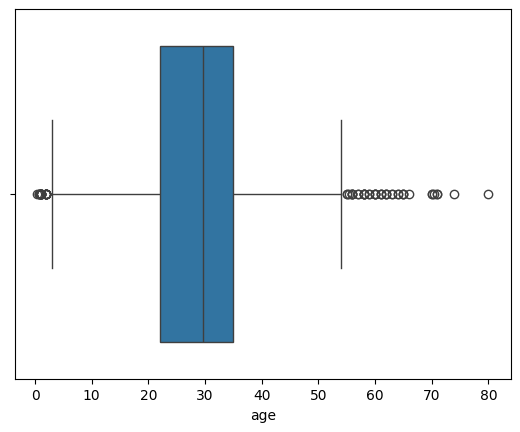

Detected Outliers in age:
        age
7     2.00
11   58.00
15   55.00
16    2.00
33   66.00
..     ...
824   2.00
827   1.00
831   0.83
851  74.00
879  56.00

[65 rows x 1 columns]


In [ ]:
sns.boxplot(x=df['age'])
plt.show()

Q1= df['age'].quantile(0.25)
Q3= df['age'].quantile(0.75)
IQR = Q3 - Q1
outliers = df[(df['age'] < (Q1 - 1.5*IQR)) | (df['age'] > (Q3 + 1.5*IQR))]
print("Detected Outliers in age:\n", outliers[['age']])

In [ ]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler
import numpy as np

# Standardization
scaler = StandardScaler()
df['age_standardized'] = scaler.fit_transform(df[['age']])

# Normalization
minmax = MinMaxScaler()
df['age_normalized'] = minmax.fit_transform(df[['age']])

# Log Transform
df['fare_log'] = np.log1p(df['fare'])
print(df[['age', 'age_standardized', 'age_normalized', 'fare', 'fare_log']].head())


    age  age_standardized  age_normalized     fare  fare_log
0  22.0         -0.590495        0.271174   7.2500  2.110213
1  38.0          0.643971        0.472229  71.2833  4.280593
2  26.0         -0.281878        0.321438   7.9250  2.188856
3  35.0          0.412509        0.434531  53.1000  3.990834
4  35.0          0.412509        0.434531   8.0500  2.202765


In [ ]:
df['sex_label'] = encoder.fit_transform(df['sex'])

class_mapping = {'Third':1, 'Second':2, 'First':3}
df['class_ordinal'] = df['class'].map(class_mapping)

print(df[['sex', 'sex_label', 'class', 'class_ordinal']].head())
